In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [3]:
import os
print(os.listdir("/gdrive/My Drive/YAZ20411/Fruits360"))
from subprocess import check_output
print(check_output(["ls", "/gdrive/My Drive/YAZ20411/Fruits360"]).decode("utf8"))

['test', 'training']
test
training



In [4]:
train_directory = "/gdrive/My Drive/YAZ20411/Fruits360/training/"
train_classes = ["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi","Lemon","Mango","Orange"]

train_arrays=[]
img_size = 100
for i in train_classes:
    path=os.path.join(train_directory,i)
    class_num=train_classes.index(i)
    for img in os.listdir(path):
        train_img_array=cv2.imread(os.path.join(path,img))
        train_img_array=cv2.cvtColor(train_img_array, cv2.COLOR_BGR2RGB)
        train_arrays.append([train_img_array,class_num])

In [5]:
test_directory = "/gdrive/My Drive/YAZ20411/Fruits360/test/"
test_classes = ["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi","Lemon","Mango","Orange"]

test_arrays=[]
img_size=100
for i in test_classes:
    path=os.path.join(test_directory,i)
    class_num2=test_classes.index(i)
    for img in os.listdir(path):
        test_img_array=cv2.imread(os.path.join(path,img))
        test_img_array=cv2.cvtColor(test_img_array, cv2.COLOR_BGR2RGB)
        test_arrays.append([test_img_array,class_num2])

In [6]:
import random
random.shuffle(train_arrays)

X_train=[]
Y_train=[]
for features,label in train_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train)

import random
random.shuffle(test_arrays)

X_test=[]
Y_test=[]
for features,label in test_arrays:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test)

In [7]:
#normalization and reshaping
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.astype('float32')
X_test /= 255

print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4306, 100, 100, 3)
shape of X_test=   (1445, 100, 100, 3)


In [8]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [9]:
Y_train.shape

(4306, 9)

In [10]:
X_train.shape

(4306, 100, 100, 3)

In [11]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

#from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

#defining optimizer
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [19]:
history = model.fit(x_train, y_train,
                  batch_size=128,
                  validation_data = (x_test, y_test),
                  epochs=20)

Epoch 1/20
27/27 [==============================] - 4s 50ms/step - loss: 2.0991 - accuracy: 0.1913 - val_loss: 1.9500 - val_accuracy: 0.6021
Epoch 2/20
27/27 [==============================] - 1s 30ms/step - loss: 0.9321 - accuracy: 0.6388 - val_loss: 0.6087 - val_accuracy: 0.9733
Epoch 3/20
27/27 [==============================] - 1s 31ms/step - loss: 0.3375 - accuracy: 0.8734 - val_loss: 0.2731 - val_accuracy: 0.9896
Epoch 4/20
27/27 [==============================] - 1s 28ms/step - loss: 0.1828 - accuracy: 0.9329 - val_loss: 0.1896 - val_accuracy: 0.9954
Epoch 5/20
27/27 [==============================] - 1s 31ms/step - loss: 0.1109 - accuracy: 0.9582 - val_loss: 0.1268 - val_accuracy: 0.9861
Epoch 6/20
27/27 [==============================] - 1s 30ms/step - loss: 0.0749 - accuracy: 0.9724 - val_loss: 0.0840 - val_accuracy: 1.0000
Epoch 7/20
27/27 [==============================] - 1s 34ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0663 - val_accuracy: 1.0000
Epoch 8/20
27

In [20]:
score_train = model.evaluate(x_train, y_train)
print("Accuracy: ", score_train[1])

108/108 [==============================] - 1s 6ms/step - loss: 0.0150 - accuracy: 0.9994
Accuracy:  0.9994192719459534


In [21]:
score_test = model.evaluate(x_test, y_test)
print("Accuracy: ", score_test[1])

27/27 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 1.0000
Accuracy:  1.0


In [16]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

27/27 [==============================] - 0s 4ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00        94
           4       1.00      1.00      1.00        91
           5       1.00      1.00      1.00        86
           6       1.00      1.00      1.00        90
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00       104

    accuracy                           1.00       862
   macro avg       1.00      1.00      1.00       862
weighted avg       1.00      1.00      1.00       862



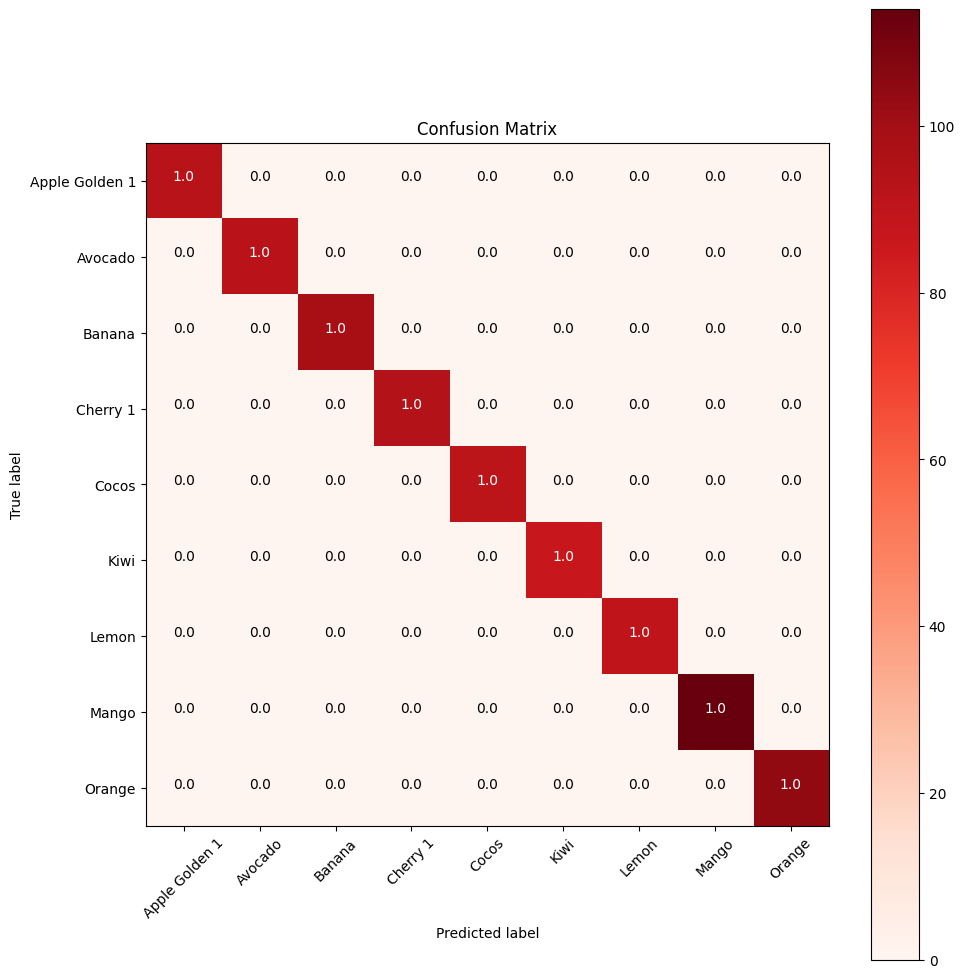

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(model, x_test, y_test):
    # Accuracy Score
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f"Accuracy: {accuracy}")

    # Precision Score
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Precision: {precision}")

    # Recall Score
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Recall: {recall}")

    # F1 Score
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"F1-Score: {f1}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    classes = ["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi","Lemon","Mango","Orange"]
    plot_confusion_matrix(cm, classes, title='Confusion Matrix')

# Modeli değerlendir
evaluate_model(model, x_test, y_test)